imports and read in data

In [160]:

#imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from scipy.stats import uniform

In [161]:
pd.set_option('display.max_columns', 200)

In [162]:
pd.set_option('display.max_rows', 150)

In [163]:
df = pd.read_csv('../datasets/main.csv')

In [164]:
df.head()

animal_id_in animal_type         color                        breed  \
0      A006100         Dog  yellow white         spinone italiano mix   
1      A006100         Dog  yellow white         spinone italiano mix   
2      A047759         Dog      tricolor                    dachshund   
3      A134067         Dog   brown white            sheepdog shetland   
4      A141142         Dog   white black  retriever labrador bull pit   

       intake_type     outcome_type intake_condition outcome_subtype  \
0    Public Assist  Return to Owner           Normal         Unknown   
1    Public Assist  Return to Owner           Normal         Unknown   
2  Owner Surrender         Transfer           Normal         Partner   
3    Public Assist  Return to Owner          Injured         Unknown   
4            Stray  Return to Owner             Aged         Unknown   

           datetime_in         datetime_out  year_in  month_in     day_in  \
0  2014-12-19 10:21:00  2014-12-20 16:35:00     2014        12     Friday   
1  2014-03-07 14:26:00  2014-03-08 17:10:00     2014         3     Friday   
2  2014-04-02 15:55:00  2014-04-07 15:12:00     2014         4  Wednesday   
3  2013-11-16 09:02:00  2013-11-16 11:54:00     2013        11   Saturday   
4  2013-11-16 14:46:00  2013-11-17 11:40:00     2013        11   Saturday   

   year_out  month_out   day_out  prev_adoption  prev_transfer  \
0      2014         12  Saturday              0              0   
1      2014          3  Saturday              0              0   
2      2014          4    Monday              0              0   
3      2013         11  Saturday              0              0   
4      2013         11    Sunday              0              0   

   prev_ret_to_owner  prev_rto_adopt  prev_disposal  prev_missing  \
0                  1               0              0             0   
1                  0               0              0             0   
2                  0               0              0             0   
3                  0               0              0             0   
4                  0               0              0             0   

   prev_relocate  age_upon_outcome  age_upon_intake sex_upon_intake  \
0              0               7.0              7.0   Neutered Male   
1              0               6.0              6.0   Neutered Male   
2              0               1.0              1.0   Neutered Male   
3              0               1.0              1.0   Neutered Male   
4              0               1.0              1.0   Spayed Female   

  sex_upon_outcome  is_named_in  is_named_out  \
0    Neutered Male            1             1   
1    Neutered Male            1             1   
2    Neutered Male            1             1   
3    Neutered Male            1             1   
4    Spayed Female            1             1   

                       found_location name_in name_out  
0   8700 Research Blvd in Austin (TX)   Scamp    Scamp  
1        8700 Research in Austin (TX)   Scamp    Scamp  
2                         Austin (TX)    Oreo     Oreo  
3  12034 Research Blvd in Austin (TX)  Bandit   Bandit  
4                         Austin (TX)  Bettie   Bettie

In [165]:
df['breed'].value_counts()

domestic shorthair mix     30788
pit bull mix                8431
domestic shorthair          8306
retriever labrador mix      6907
chihuahua shorthair mix     6223
                           ...  
poodle beagle miniature        1
ibizan hound bull pit          1
bull pit harrier               1
doberman vizsla pinsch         1
basenji beagle                 1
Name: breed, Length: 2108, dtype: int64

In [166]:
breed = df['breed']

In [167]:
breed

0                spinone italiano mix
1                spinone italiano mix
2                           dachshund
3                   sheepdog shetland
4         retriever labrador bull pit
                     ...             
127139         retriever labrador mix
127140         retriever labrador mix
127141                            bat
127142                            bat
127143                            fox
Name: breed, Length: 127144, dtype: object

In [168]:
df['color'].value_counts()

white black              16795
black                    10756
brown tabby               7226
brown white               6714
tan white                 5777
                         ...  
green silver                 1
blue tick black smoke        1
gray point lilac             1
red tick black               1
orange tabby apricot         1
Name: color, Length: 373, dtype: int64

In [169]:
color = df['color']

In [170]:
color

0         yellow white
1         yellow white
2             tricolor
3          brown white
4          white black
              ...     
127139           brown
127140           brown
127141           brown
127142           brown
127143           brown
Name: color, Length: 127144, dtype: object

In [171]:
cvec = CountVectorizer( )

In [172]:
c_breed = cvec.fit_transform(breed)

In [173]:
c_color = cvec.fit_transform(color)

In [174]:
km = KMeans(n_clusters=30)

In [175]:
km.fit(c_breed)

KMeans(n_clusters=30)

In [176]:
km.cluster_centers_

array([[1.18736642e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.01667468e-04, 5.61167228e-04, 0.00000000e+00, ...,
        8.01667468e-05, 0.00000000e+00, 7.21500722e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.39664804e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.25698324e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.21543408e-04, 0.00000000e+00, ...,
        0.00000000e+00, 2.05787781e-02, 0.00000000e+00]])

In [177]:
km.labels_

array([ 1,  1, 16, ..., 13, 13, 13])

In [178]:
test = pd.DataFrame(breed)

In [179]:
test['cluster'] = km.labels_

In [180]:
test['animal_type'] = df['animal_type'].map({
    'Dog': 1,
    'Cat': 2,
    'Bird': 3,
    'Livestock' :4,
    'Other' :5
})

In [181]:
test

breed  cluster  animal_type
0              spinone italiano mix        1            1
1              spinone italiano mix        1            1
2                         dachshund       16            1
3                 sheepdog shetland       13            1
4       retriever labrador bull pit       14            1
...                             ...      ...          ...
127139       retriever labrador mix        2            1
127140       retriever labrador mix        2            1
127141                          bat       13            5
127142                          bat       13            5
127143                          fox       13            5

[127144 rows x 3 columns]

In [182]:
test['cluster'].value_counts().sort_index()

0      8422
1     12474
2      7259
3      8754
4      7036
5      4021
6      5283
7     30788
8      1189
9       578
10     1863
11     3562
12     2783
13     6199
14      615
15     1990
16     1918
17     4201
18     1473
19     1278
20      903
21     1372
22     1558
23      982
24     1996
25     2409
26      906
27      716
28     1506
29     3110
Name: cluster, dtype: int64

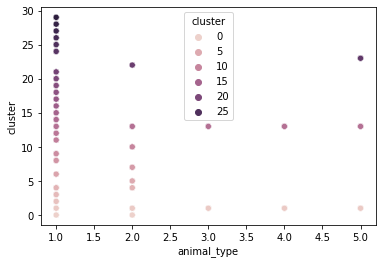

In [183]:
sns.scatterplot(x='animal_type', y='cluster', hue='cluster', data=test);

In [184]:
test.sort_values(by='cluster').head(150)

breed  cluster  animal_type
111005                 domestic shorthair        0            2
113476                 domestic shorthair        0            2
102534                 domestic shorthair        0            2
102535                 domestic shorthair        0            2
113462                 domestic shorthair        0            2
113461                 domestic shorthair        0            2
102536                 domestic shorthair        0            2
102537                 domestic shorthair        0            2
113454                 domestic shorthair        0            2
102538                 domestic shorthair        0            2
113450                 domestic shorthair        0            2
113444                 domestic shorthair        0            2
113441                 domestic shorthair        0            2
113439                 domestic shorthair        0            2
113438                 domestic shorthair        0            2
102539                 domestic shorthair        0            2
113426                 domestic shorthair        0            2
113425                 domestic shorthair        0            2
102533                 domestic shorthair        0            2
102543                 domestic shorthair        0            2
102532                 domestic shorthair        0            2
102510                 domestic shorthair        0            2
113525                 domestic shorthair        0            2
102501                 domestic shorthair        0            2
113517                 domestic shorthair        0            2
113516                 domestic shorthair        0            2
113514                 domestic shorthair        0            2
113513                 domestic shorthair        0            2
113512                 domestic shorthair        0            2
113511                 domestic shorthair        0            2
102504                 domestic shorthair        0            2
113508                 domestic shorthair        0            2
113507                 domestic shorthair        0            2
102506                 domestic shorthair        0            2
102507                 domestic shorthair        0            2
102508                 domestic shorthair        0            2
102509                 domestic shorthair        0            2
113500                 domestic shorthair        0            2
113499                 domestic shorthair        0            2
102524                 domestic shorthair        0            2
113526                 domestic shorthair        0            2
102544                 domestic shorthair        0            2
113418                 domestic shorthair        0            2
113349                 domestic shorthair        0            2
102561                 domestic shorthair        0            2
113343                 domestic shorthair        0            2
102563                 domestic shorthair        0            2
102565                 domestic shorthair        0            2
113325                 domestic shorthair        0            2
102566                 domestic shorthair        0            2
102567                 shorthair american        0            2
113315                 domestic shorthair        0            2
24139                  domestic shorthair        0            2
113297                 domestic shorthair        0            2
102580                 domestic shorthair        0            2
102581                 domestic shorthair        0            2
113291                 domestic shorthair        0            2
113290                 domestic shorthair        0            2
113289                 domestic shorthair        0            2
102586                 domestic shorthair        0            2
113351                 domestic shorthair        0            2
102547                 domestic shorthair        0            2
1133

In [185]:
km = KMeans(n_clusters=30)

In [186]:
km.fit(c_color)

KMeans(n_clusters=30)

In [187]:
km.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00293152, 0.01113977, 0.        , ..., 0.04444184, 0.78424015,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.03832421, 0.        ,
        0.00190431],
       ...,
       [0.        , 0.        , 0.00106553, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02894955, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [188]:
km.labels_

array([18, 18, 16, ...,  6,  6,  6])

In [189]:
test['color'] = km.labels_

In [190]:
test['color'].value_counts().sort_index()

0      6875
1      8528
2     12603
3      7461
4     17230
5      5777
6      7129
7      3669
8      3289
9      5332
10     5361
11     4286
12     2501
13     2036
14     2441
15     4004
16     3024
17     2099
18     1040
19     3989
20     1742
21     1881
22     1760
23     1659
24     2495
25     2637
26     2215
27     1877
28     1209
29      995
Name: color, dtype: int64

C:\Users\rgf60\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


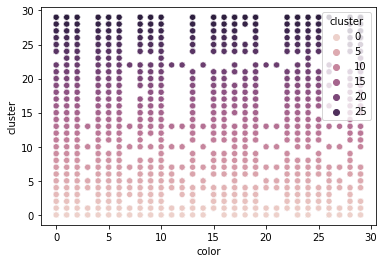

In [191]:
sns.scatterplot(x='color', y='cluster', hue='cluster', data=test);

In [192]:
test.head()

breed  cluster  animal_type  color
0         spinone italiano mix        1            1     18
1         spinone italiano mix        1            1     18
2                    dachshund       16            1     16
3            sheepdog shetland       13            1      0
4  retriever labrador bull pit       14            1      4

In [193]:
df['cluster'] = test['cluster']

In [194]:
df['color'] = test['color']

In [196]:
df.head()

animal_id_in animal_type  color                        breed  \
0      A006100         Dog     18         spinone italiano mix   
1      A006100         Dog     18         spinone italiano mix   
2      A047759         Dog     16                    dachshund   
3      A134067         Dog      0            sheepdog shetland   
4      A141142         Dog      4  retriever labrador bull pit   

       intake_type     outcome_type intake_condition outcome_subtype  \
0    Public Assist  Return to Owner           Normal         Unknown   
1    Public Assist  Return to Owner           Normal         Unknown   
2  Owner Surrender         Transfer           Normal         Partner   
3    Public Assist  Return to Owner          Injured         Unknown   
4            Stray  Return to Owner             Aged         Unknown   

           datetime_in         datetime_out  year_in  month_in     day_in  \
0  2014-12-19 10:21:00  2014-12-20 16:35:00     2014        12     Friday   
1  2014-03-07 14:26:00  2014-03-08 17:10:00     2014         3     Friday   
2  2014-04-02 15:55:00  2014-04-07 15:12:00     2014         4  Wednesday   
3  2013-11-16 09:02:00  2013-11-16 11:54:00     2013        11   Saturday   
4  2013-11-16 14:46:00  2013-11-17 11:40:00     2013        11   Saturday   

   year_out  month_out   day_out  prev_adoption  prev_transfer  \
0      2014         12  Saturday              0              0   
1      2014          3  Saturday              0              0   
2      2014          4    Monday              0              0   
3      2013         11  Saturday              0              0   
4      2013         11    Sunday              0              0   

   prev_ret_to_owner  prev_rto_adopt  prev_disposal  prev_missing  \
0                  1               0              0             0   
1                  0               0              0             0   
2                  0               0              0             0   
3                  0               0              0             0   
4                  0               0              0             0   

   prev_relocate  age_upon_outcome  age_upon_intake sex_upon_intake  \
0              0               7.0              7.0   Neutered Male   
1              0               6.0              6.0   Neutered Male   
2              0               1.0              1.0   Neutered Male   
3              0               1.0              1.0   Neutered Male   
4              0               1.0              1.0   Spayed Female   

  sex_upon_outcome  is_named_in  is_named_out  \
0    Neutered Male            1             1   
1    Neutered Male            1             1   
2    Neutered Male            1             1   
3    Neutered Male            1             1   
4    Spayed Female            1             1   

                       found_location name_in name_out  cluster  
0   8700 Research Blvd in Austin (TX)   Scamp    Scamp        1  
1        8700 Research in Austin (TX)   Scamp    Scamp        1  
2                         Austin (TX)    Oreo     Oreo       16  
3  12034 Research Blvd in Austin (TX)  Bandit   Bandit       13  
4                         Austin (TX)  Bettie   Bettie       14

In [197]:
df = df.drop(columns=['animal_id_in', 'breed', 'outcome_subtype', 'year_out', 'month_out', 'day_out', 'datetime_out',
                                 'name_out', 'is_named_out','sex_upon_outcome', 'age_upon_outcome', 'name_in',
                                 'found_location', 'datetime_in'])

In [198]:
df.head()

animal_type  color      intake_type     outcome_type intake_condition  \
0         Dog     18    Public Assist  Return to Owner           Normal   
1         Dog     18    Public Assist  Return to Owner           Normal   
2         Dog     16  Owner Surrender         Transfer           Normal   
3         Dog      0    Public Assist  Return to Owner          Injured   
4         Dog      4            Stray  Return to Owner             Aged   

   year_in  month_in     day_in  prev_adoption  prev_transfer  \
0     2014        12     Friday              0              0   
1     2014         3     Friday              0              0   
2     2014         4  Wednesday              0              0   
3     2013        11   Saturday              0              0   
4     2013        11   Saturday              0              0   

   prev_ret_to_owner  prev_rto_adopt  prev_disposal  prev_missing  \
0                  1               0              0             0   
1                  0               0              0             0   
2                  0               0              0             0   
3                  0               0              0             0   
4                  0               0              0             0   

   prev_relocate  age_upon_intake sex_upon_intake  is_named_in  cluster  
0              0              7.0   Neutered Male            1        1  
1              0              6.0   Neutered Male            1        1  
2              0              1.0   Neutered Male            1       16  
3              0              1.0   Neutered Male            1       13  
4              0              1.0   Spayed Female            1       14

In [199]:
df = pd.get_dummies(df, columns=['animal_type', 'color', 'cluster', 'intake_type', 'intake_condition', 
                                'year_in', 'month_in', 'day_in', 'sex_upon_intake'] , drop_first=True)

In [200]:
df.head()

outcome_type  prev_adoption  prev_transfer  prev_ret_to_owner  \
0  Return to Owner              0              0                  1   
1  Return to Owner              0              0                  0   
2         Transfer              0              0                  0   
3  Return to Owner              0              0                  0   
4  Return to Owner              0              0                  0   

   prev_rto_adopt  prev_disposal  prev_missing  prev_relocate  \
0               0              0             0              0   
1               0              0             0              0   
2               0              0             0              0   
3               0              0             0              0   
4               0              0             0              0   

   age_upon_intake  is_named_in  animal_type_Cat  animal_type_Dog  \
0              7.0            1                0                1   
1              6.0            1                0                1   
2              1.0            1                0                1   
3              1.0            1                0                1   
4              1.0            1                0                1   

   animal_type_Livestock  animal_type_Other  color_1  color_2  color_3  \
0                      0                  0        0        0        0   
1                      0                  0        0        0        0   
2                      0                  0        0        0        0   
3                      0                  0        0        0        0   
4                      0                  0        0        0        0   

   color_4  color_5  color_6  color_7  color_8  color_9  color_10  color_11  \
0        0        0        0        0        0        0         0         0   
1        0        0        0        0        0        0         0         0   
2        0        0        0        0        0        0         0         0   
3        0        0        0        0        0        0         0         0   
4        1        0        0        0        0        0         0         0   

   color_12  color_13  color_14  color_15  color_16  color_17  color_18  \
0         0         0         0         0         0         0         1   
1         0         0         0         0         0         0         1   
2         0         0         0         0         1         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   color_19  color_20  color_21  color_22  color_23  color_24  color_25  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   color_26  color_27  color_28  color_29  cluster_1  cluster_2  cluster_3  \
0         0         0         0         0          1          0          0   
1         0         0         0         0          1          0          0   
2         0         0         0         0          0          0          0   
3         0         0         0         0          0          0          0   
4         0         0         0         0          0          0          0   

   cluster_4  cluster_5  cluster_6  cluster_7  cluster_8  cluster_9  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   cluster_10  cluster_11  cluster_12  cluster_13  clus

In [201]:
X = df.drop(columns=['outcome_type'])

y = df['outcome_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y )

In [202]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [203]:
rf = RandomForestClassifier()

In [204]:
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [205]:
preds = rf.predict(X_test_sc)

In [206]:
print(f'training score: {rf.score(X_train_sc, y_train)}')
print(f'testing score: {rf.score(X_test_sc, y_test)}')

training score: 0.9906877241552885
testing score: 0.681306235449569


In [208]:
#log reg

In [214]:
lr = LogisticRegression(max_iter=2000)

In [215]:
lr.fit(X_train_sc, y_train)

LogisticRegression(max_iter=2000)

In [216]:
preds = lr.predict(X_test_sc)

In [217]:
print(f'training score: {lr.score(X_train_sc, y_train)}')
print(f'testing score: {lr.score(X_test_sc, y_test)}')

training score: 0.64140397239875
testing score: 0.636443717359844


In [219]:
set(zip(df.columns, lr.coef_[0]))

{('age_upon_intake', 0.33455087618449725),
 ('animal_type_Cat', -0.2521293615259234),
 ('animal_type_Dog', 0.018666865845310125),
 ('animal_type_Livestock', -0.16642835635450842),
 ('animal_type_Other', -0.047571355681168305),
 ('cluster_1', 0.1262561475969808),
 ('cluster_10', 0.2123412888977593),
 ('cluster_11', 0.19204891523860007),
 ('cluster_12', 0.01038556620343492),
 ('cluster_13', 0.03627278524710258),
 ('cluster_14', 0.04246661113822081),
 ('cluster_15', 0.13975243250308209),
 ('cluster_16', 0.07739386277713485),
 ('cluster_17', 0.03255001113564626),
 ('cluster_18', 0.03650786764632719),
 ('cluster_19', 0.07010136158768338),
 ('cluster_2', -0.04900198379427193),
 ('cluster_20', 0.12416829099516648),
 ('cluster_21', 0.016756859398580636),
 ('cluster_22', -0.1816547252263368),
 ('cluster_23', 0.1581783273524851),
 ('cluster_24', -0.034658236565869006),
 ('cluster_25', 0.09264503876479559),
 ('cluster_26', 0.0008947711446543644),
 ('cluster_27', 0.12550441620866934),
 ('cluster_2

In [220]:
set(zip(df.columns, np.exp(lr.coef_[0]) ))

{('age_upon_intake', 1.3973126778725218),
 ('animal_type_Cat', 0.7771441990066971),
 ('animal_type_Dog', 1.0188421809476975),
 ('animal_type_Livestock', 0.846683474253231),
 ('animal_type_Other', 0.9535424300354064),
 ('cluster_1', 1.1345727491489352),
 ('cluster_10', 1.236569840627946),
 ('cluster_11', 1.2117297875669486),
 ('cluster_12', 1.0104396833797036),
 ('cluster_13', 1.0369386694853855),
 ('cluster_14', 1.0433812184807958),
 ('cluster_15', 1.1499890636991135),
 ('cluster_16', 1.0804675485475528),
 ('cluster_17', 1.033085557634019),
 ('cluster_18', 1.037182464170454),
 ('cluster_19', 1.0726168978960244),
 ('cluster_2', 0.9521792407689076),
 ('cluster_20', 1.1322063951079462),
 ('cluster_21', 1.0168980430628722),
 ('cluster_22', 0.833889211624346),
 ('cluster_23', 1.1713750642975187),
 ('cluster_24', 0.9659354812795071),
 ('cluster_25', 1.0970722480254675),
 ('cluster_26', 1.0008951715717764),
 ('cluster_27', 1.1337201756943396),
 ('cluster_28', 1.1921760333106004),
 ('cluster_2

In [222]:
#change to binary classification

In [221]:
df['outcome_type'].value_counts()

Adoption           57116
Transfer           37056
Return to Owner    21827
Euthanasia          8581
Died                1134
Rto-Adopt            758
Disposal             584
Missing               66
Relocate              22
Name: outcome_type, dtype: int64

In [223]:
df['outcome_type'] = df['outcome_type'].map({
    'Adoption' : 'Adoption',
    'Transfer' : 'Not Adoption',        
    'Return to Owner': 'Not Adoption',    
    'Euthanasia': 'Not Adoption',         
    'Died': 'Not Adoption',                
    'Rto-Adopt': 'Not Adoption',           
    'Disposal': 'Not Adoption',            
    'Missing': 'Not Adoption',             
    'Relocate': 'Not Adoption' 
    })

In [225]:
X = df.drop(columns=['outcome_type'])

y = df['outcome_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y )

In [226]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [227]:
lr = LogisticRegression(max_iter=2000)

In [228]:
lr.fit(X_train_sc, y_train)

LogisticRegression(max_iter=2000)

In [229]:
preds = lr.predict(X_test_sc)

In [230]:
print(f'training score: {lr.score(X_train_sc, y_train)}')
print(f'testing score: {lr.score(X_test_sc, y_test)}')

training score: 0.6953061096080035
testing score: 0.6898320015100988


In [231]:
set(zip(df.columns, np.exp(lr.coef_[0]) ))

{('age_upon_intake', 0.6077817925541642),
 ('animal_type_Cat', 2.609399457978706),
 ('animal_type_Dog', 1.0163963748159814),
 ('animal_type_Livestock', 1.502959695821686),
 ('animal_type_Other', 1.037656467398128),
 ('cluster_1', 0.870845849343798),
 ('cluster_10', 0.9037194647432786),
 ('cluster_11', 0.8952641041920302),
 ('cluster_12', 0.9618268934013665),
 ('cluster_13', 0.9937068781874564),
 ('cluster_14', 0.9485715132900743),
 ('cluster_15', 0.9224427815653682),
 ('cluster_16', 0.8999549483118907),
 ('cluster_17', 0.9705730037858065),
 ('cluster_18', 0.977179817015329),
 ('cluster_19', 0.9442989827916785),
 ('cluster_2', 0.9802949250403901),
 ('cluster_20', 0.9421653482056696),
 ('cluster_21', 0.9875618875080603),
 ('cluster_22', 1.3079391502177282),
 ('cluster_23', 0.9359772567030912),
 ('cluster_24', 0.9847464183711152),
 ('cluster_25', 0.9660609622038433),
 ('cluster_26', 1.1047824080909678),
 ('cluster_27', 0.9283919187466366),
 ('cluster_28', 0.898548613079063),
 ('cluster_29

In [239]:
lr = LogisticRegression(max_iter=2000, C=.1,  penalty='l1', solver='saga')

In [240]:
lr.fit(X_train_sc, y_train)

LogisticRegression(C=0.1, max_iter=2000, penalty='l1', solver='saga')

In [241]:
preds = lr.predict(X_test_sc)

In [242]:
print(f'training score: {lr.score(X_train_sc, y_train)}')
print(f'testing score: {lr.score(X_test_sc, y_test)}')

training score: 0.6952222152310241
testing score: 0.6898634619014661
